# Lab 8 - Classification and Regression Trees

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,  plot_tree
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

## Task 1

In [42]:
data_1 = pd.read_csv("data\\SAheart.data", index_col=0)
data_1.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [43]:
X = data_1.iloc[:, :-1]
y = data_1.iloc[:, -1]
X = X.replace("Present", 1)
X = X.replace("Absent", 0)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
row.names,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49


### (a)

In [44]:
# Fit a classification tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Check how different parameters affect the structure and size of the tree
param_grid = {'max_depth': [2, 4, 6, 8, 10, 20, None], 'min_samples_split': [2, 5, 10], 'criterion': ["gini", "entropy", "log_loss"]}
grid_search = GridSearchCV(tree, param_grid)
grid_search.fit(X, y)
pass

### (b)

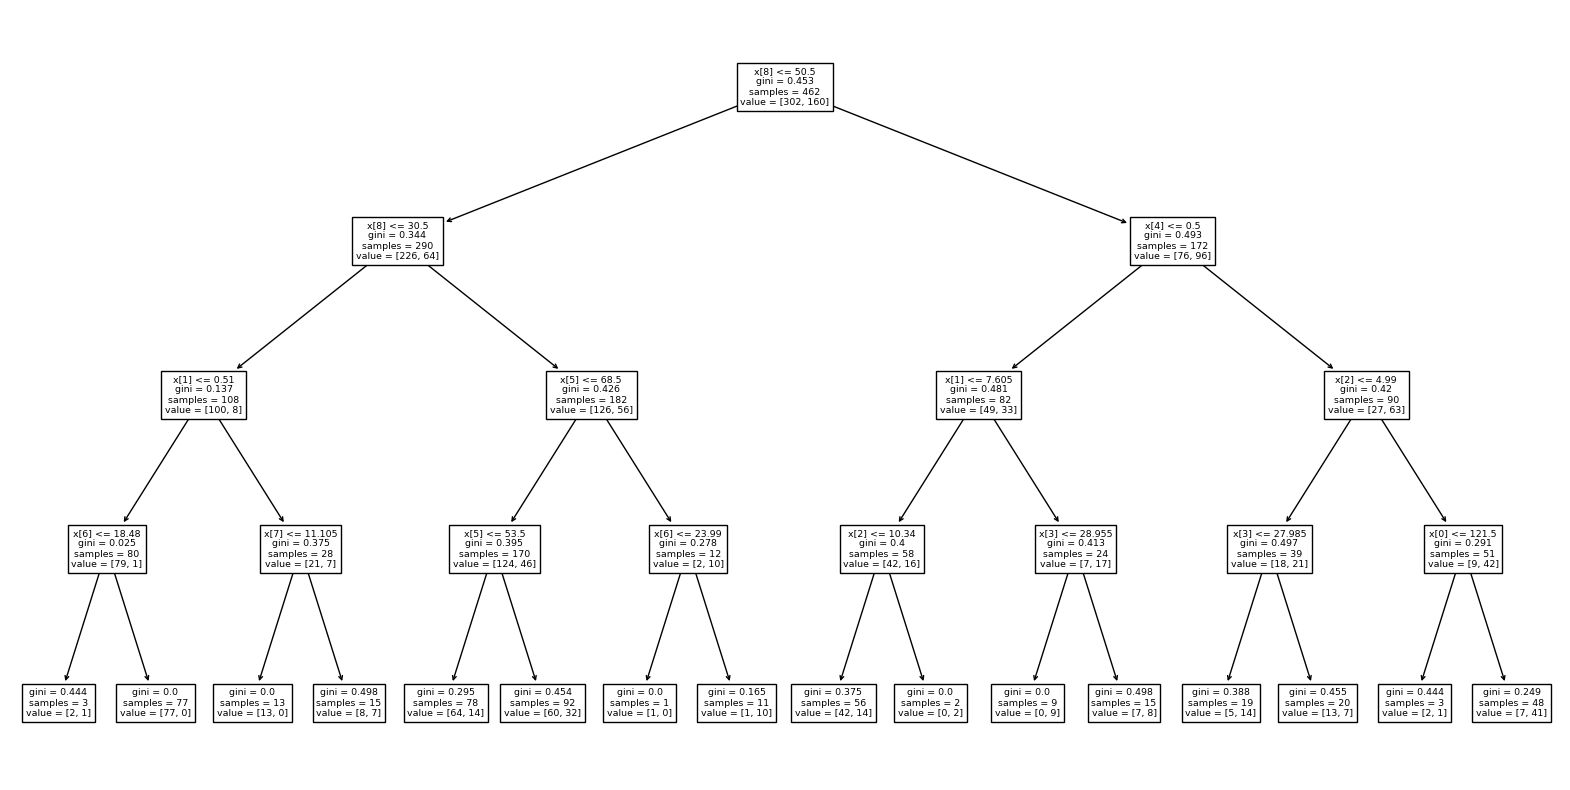

In [45]:
# Draw the structure of the tree
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_)
plt.show()

### (c)

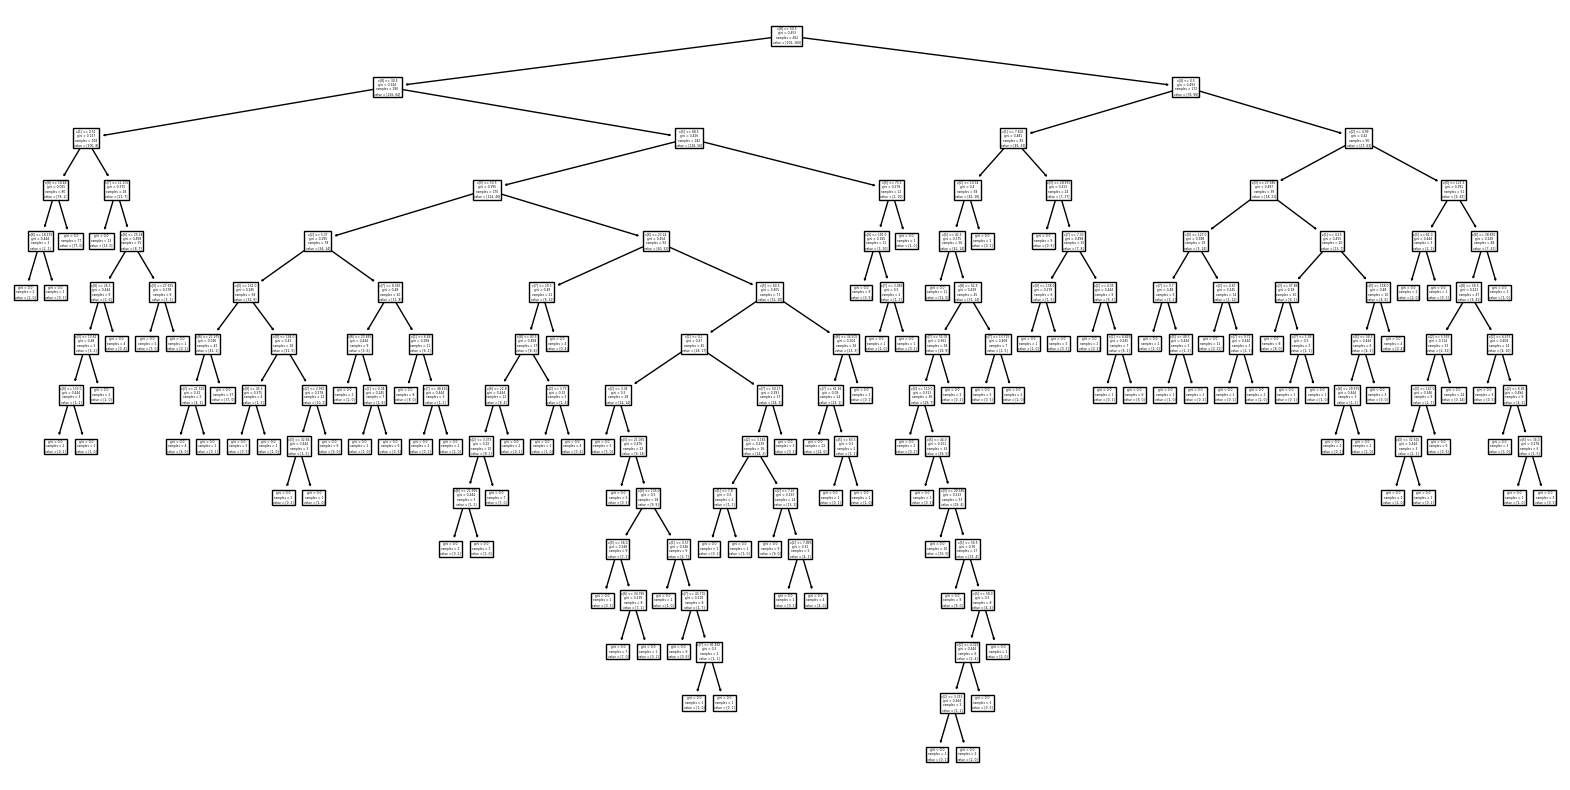

In [46]:
path = tree.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas
tree_scores = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    tree.fit(X, y)
    tree_scores.append(tree.score(X, y))

best_ccp_alpha = ccp_alphas[tree_scores.index(max(tree_scores))]
best_tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
best_tree.fit(X, y)
plt.figure(figsize=(20,10))
plot_tree(best_tree)
plt.show()

## Task 2

In [47]:
# Load the data
data = pd.read_csv('data\\fitness.txt', sep=" ")

# Define the target variable and the feature variables
target = ['Oxygen']
features = ['Age', 'Weight', 'RunTime', 'RestPulse', 'RunPulse', 'MaxPulse']

X = data[features]
y = data[target]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        31 non-null     int64  
 1   Weight     31 non-null     float64
 2   Oxygen     31 non-null     float64
 3   RunTime    31 non-null     float64
 4   RestPulse  31 non-null     int64  
 5   RunPulse   31 non-null     int64  
 6   MaxPulse   31 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.8 KB


### (a)

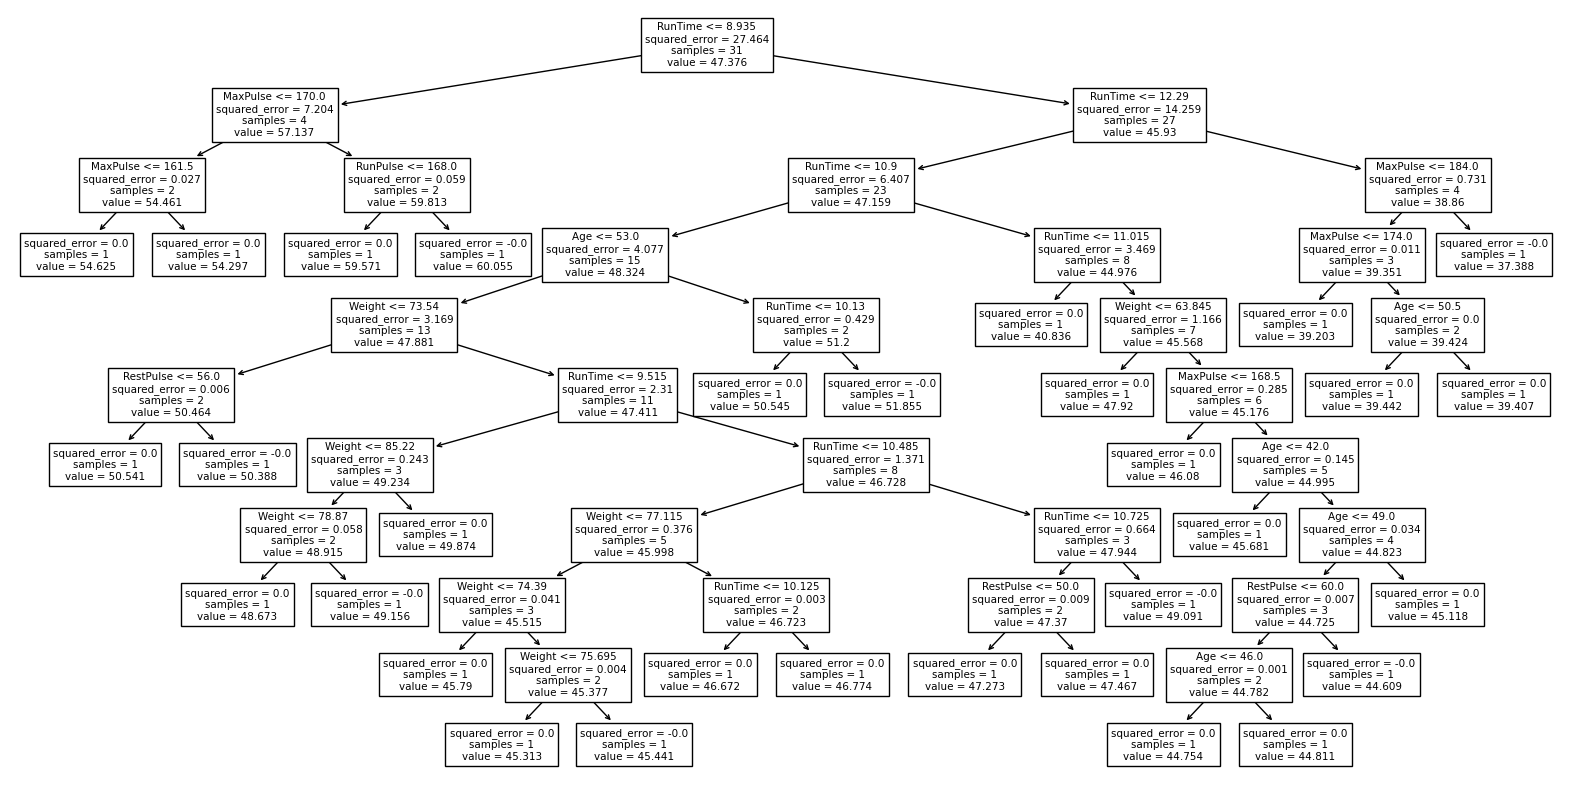

In [48]:
# Fit a regression tree using default parameters
tree = DecisionTreeRegressor()
tree.fit(X, y)

# Visualize the structure of the tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=features)
plt.show()


### (b)

In [49]:
# Using the fitted model, answer the question: for which runner the oxygen consumption is assessed as the highest?
prediction = tree.predict(data[features])
highest_oxygen_index = prediction.argmax()
print(f'The runner with the highest assessed oxygen consumption is: {highest_oxygen_index}')

The runner with the highest assessed oxygen consumption is: 20


### (c)

In [50]:
# Make a prediction for observation described by feature vector x0, for which coordinates are equal to the means of the variables (so x0 is a typical runner)
x0 = data[features].mean().values.reshape(1,-1)
prediction_x0 = tree.predict(x0)
print(f'The predicted oxygen consumption for a typical runner is: {prediction_x0[0]}')

The predicted oxygen consumption for a typical runner is: 47.467


c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### (d)

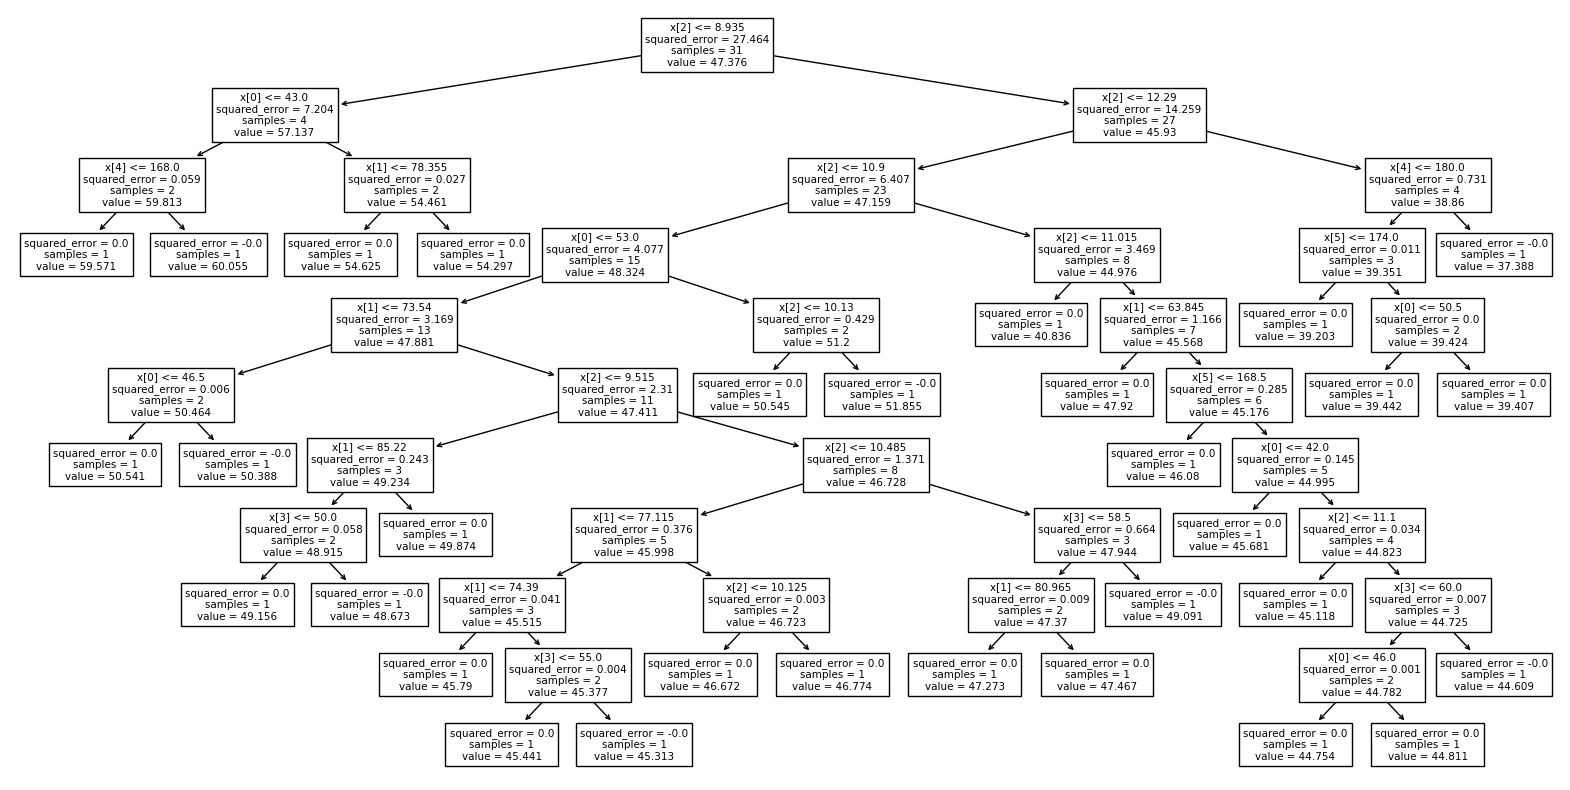

In [51]:
# Choose the optimal sub-tree using cost-complexity criterion
path = tree.cost_complexity_pruning_path(data[features], data[target])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

tree_scores = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    tree.fit(X, y)
    tree_scores.append(tree.score(data[features], data[target]))

best_ccp_alpha = ccp_alphas[tree_scores.index(max(tree_scores))]
best_tree = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)
best_tree.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(best_tree)
plt.show()

### (e)

c:\Users\WOlejnik\anaconda3\envs\aml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


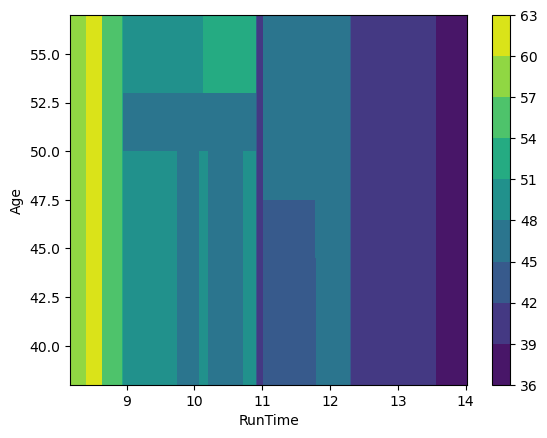

In [52]:
# Fit a tree model using only two variables: RunTime and Age
features_2 = ['RunTime', 'Age']
tree_2 = DecisionTreeRegressor()
tree_2.fit(data[features_2], data[target])

# Make a visualization of the predicted values Oxygen
x1, x2 = data['RunTime'], data['Age']
xx1, xx2 = np.meshgrid(np.arange(x1.min(), x1.max(), 0.01), np.arange(x2.min(), x2.max(), 0.01))
Z = tree_2.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z)
# plt.scatter(x1, x2, c=data[target])
plt.xlabel('RunTime')
plt.ylabel('Age')
plt.colorbar()
plt.show()

### Task 3

In [53]:
class BaggingRegressor:
    """
    A bagging regressor that aggregates predictions from multiple decision trees
    """

    def __init__(self, n_estimators=10, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, max_features=self.max_features)
            # Bootstrap sampling with replacement
            bootstrap_indices = np.random.choice(range(len(X)), size=len(X), replace=True)
            tree.fit(X[bootstrap_indices], y[bootstrap_indices])
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for tree in self.trees:
            y_pred += tree.predict(X)
        y_pred /= self.n_estimators
        return y_pred


In [69]:
# Load data
df1 = pd.read_csv("data\\SAheart.data", index_col=0).reset_index()
df2 = pd.read_csv('data\\fitness.txt', sep=' ')

X1 = df1.iloc[:, :-1]
y1 = df1.iloc[:, -1]
X1 = X1.replace("Present", 1)
X1 = X1.replace("Absent", 0)

X2 = df2[['Age', 'Weight', 'RunTime', 'RestPulse', 'RunPulse', 'MaxPulse']]
y2 = df2[['Oxygen']]

# Set up cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define bagging model and single tree model
bagging = BaggingRegressor(n_estimators=10, max_depth=10, max_features='sqrt')
tree = DecisionTreeRegressor(max_depth=10)

print

mse_bagging1 = 0
mse_tree1 = 0
for train_indices, test_indices in kf.split(X1):
    # print(train_indices, test_indices)
    X_train, X_test = X1.iloc[train_indices, :], X1.iloc[test_indices, :]
    y_train, y_test = y1.iloc[train_indices], y1.iloc[test_indices]
    # Fit and evaluate bagging model
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    mse_bagging1 += mean_squared_error(y_test, y_pred) / n_splits
    # Fit and evaluate single tree model
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    mse_tree1 += mean_squared_error(y_test, y_pred) / n_splits
print(f'MSE bagging (winequality-red): {mse_bagging1:.4f}')
print(f'MSE single tree (winequality-red): {mse_tree1:.4f}')

# Evaluate models on fitness dataset
mse_bagging2 = 0
mse_tree2 = 0
for train_indices, test_indices in kf.split(X2):
    # print(train_indices, test_indices)
    X_train, X_test = X2.iloc[train_indices, :], X2.iloc[test_indices, :]
    y_train, y_test = y2.iloc[train_indices], y2.iloc[test_indices]
    # Fit and evaluate bagging model
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    mse_bagging2 += mean_squared_error(y_test, y_pred) / n_splits
    # Fit and evaluate single tree model
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    mse_tree2 += mean_squared_error(y_test, y_pred) / n_splits
print(f'MSE bagging (winequality-red): {mse_bagging2:.4f}')
print(f'MSE single tree (winequality-red): {mse_tree2:.4f}')



KeyError: "None of [Int64Index([367, 104, 293,  62, 294, 183, 187,  16, 343, 276,\n            ...\n            364, 319, 217,  96, 204,  77, 321,  58,  79, 140],\n           dtype='int64', length=369)] are in the [columns]"